In [3]:
# imports 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
import matplotlib.pyplot as plt

import numpy as np
from math import pi

from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Lab 1: Single-Qubit and Multi-Qubit Operations in Qiskit

**Welcome to the Qiskit Fall Fest Uniandes 2025!**

We are honoured to have you join us for this hands-on programme. This event is part of our celebration for the **International Quantum Year 2025 (IYQ 2025)**, a global initiative to recognise and promote the progress of quantum science and technology.

In this first lab, we will go from the world of **classical bits** to **quantum bits (qubits)**, and connect:

* the **maths** (kets, amplitudes, matrices),
* and the **code** (Qiskit circuits and simulators).

You do **not** need prior experience in quantum computing. We will build the basic concepts step by step and how to code them up in Qiskit.

---

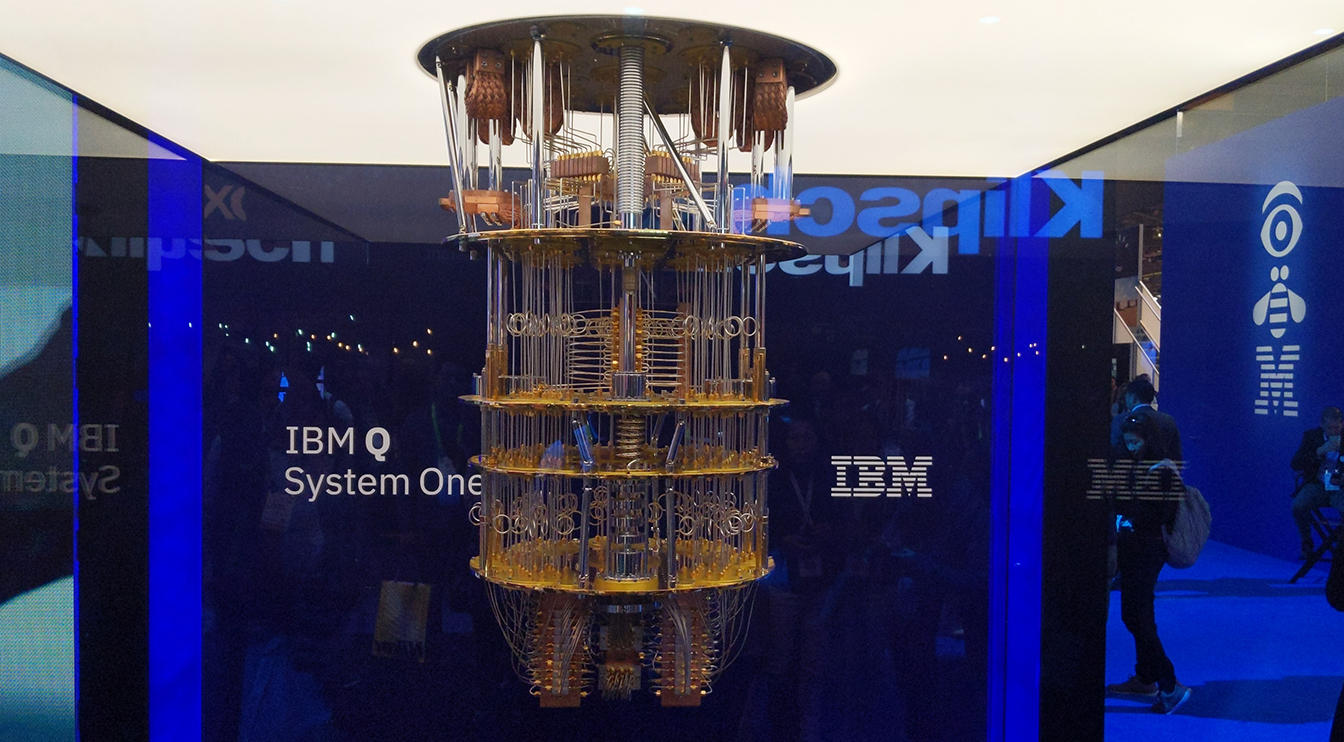

### 📸 Have you ever seen what a real quantum computer looks like?

Here is the **IBM Q System One**-the chandelier, one of the first quantum computers designed for eventual commercial and scientific exploration, famous for its striking glass-enclosed design.

Image taken from: [1]

---

# Part 1: Single-Qubit Systems

## 1.1 From classical bits to qubits

In a **classical** computer, the bit is the basic unit of information; it can only be in one of two possible states:

* `0`
* `1`

At any given time the bit is **either** 0 **or** 1, never both. A register of many bits is just a bit string; for instance, `0101`, `1110`, etc. are bit strings of 4 bits.

In a **quantum** computer, the basic unit of information is the **qubit** (quantum bit). A qubit can not only be in states we call “0” and “1”, but it can additionally be in a **superposition or linear combination** of these two states: a kind of weighted sum of both possibilities “0” and “1” at once.

### A Note on Measurement (The "Hype" Check)

This is the most misunderstood part of quantum computing. While a qubit can *exist* in this combined state, you can **never** "see" the superposition directly. The moment you try to **measure** a qubit, its state "collapses" to a single classical answer, either `0` or `1`. Every time we try to extract information out of a quantum computer is going to be in the form of bits not qubits.

So, where is the power of quantum computation? The power comes from letting the qubits **evolve and interfere** in superposition *during* the computation. We manipulate these complex states, let them interact, and *then* measure at the very end to get a final, classical answer that (we hope) has a high probability of being the correct one.

## 1.2 Kets and the computational basis

Mathematically, we represent the two “basis” states, “0” and “1,” of a qubit as column vectors:

$$
|0\rangle \;=\; \begin{bmatrix}1\\0\end{bmatrix},
\qquad
|1\rangle \;=\; \begin{bmatrix}0\\1\end{bmatrix}.
$$

The symbols $|0\rangle$ and $|1\rangle$ are called **kets**. This notation, $|\psi\rangle$, comes from Paul Dirac and is the standard way to write a quantum state vector (specifically, as a column vector). You can think of $|\quad\rangle$ as a single piece of notation; the $\rangle$ is just part of the symbol, not a "greater than" sign. The pair of kets $\{|0\rangle, |1\rangle\}$ is called the **computational basis**.

A general (pure) state of a single qubit is a **linear combination** (superposition) of these two basis states:

$$
|\psi\rangle \;=\; \alpha\,|0\rangle \;+\; \beta\,|1\rangle,
$$

where $\alpha$ and $\beta$ are complex numbers called **(probability) amplitudes**.

In vector form this is simply

$$
|\psi\rangle \;=\;
\begin{bmatrix}\alpha \\ \beta\end{bmatrix}.
$$

To make physical and mathematical sense, the total probability must add up to 1, so the amplitudes satisfy

$$
|\alpha|^2 + |\beta|^2 = 1.
$$

Here, we interpret these values as follows:

* $|\alpha|^2$ is the probability of getting outcome `0` if we measure the qubit.
* $|\beta|^2$ is the probability of getting outcome `1`.

**Example:**

* State $|0\rangle$ has $\alpha = 1$, $\beta = 0$ ⇒ probabilities $(1, 0)$.
* State $|1\rangle$ has $\alpha = 0$, $\beta = 1$ ⇒ probabilities $(0, 1)$.
* The “plus” state
$$
|+\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle
$$
has $|\alpha|^2 = |\beta|^2 = \tfrac{1}{2}$, so measuring gives 0 or 1 with equal probability.

Two states that differ only by an overall **global phase** (a complex number of modulus 1) represent the same physical state. For example,

$$
|\psi\rangle
= \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\quad\text{and}\quad
e^{i\theta}|\psi\rangle
$$

give the **same** measurement statistics or probabilities for any value of $\theta$.

---

## 💡 Pro-Tip: An Alternative Way to Write the Qubit State

We've written the state as $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$. This is the standard algebraic form.

However, since we only need *two* real numbers to define the state (plus a global phase we can ignore), we can also use a **geometric** form. This is extremely useful in quantum machine learning for **encoding data**.

We can rewrite *any* qubit state using two real angles, $\theta$ (the "polar" angle) and $\phi$ (the "azimuthal" angle):

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle \;+\; e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle
$$

* $\theta$ (theta) controls the *amount* of superposition between $|0\rangle$ and $|1\rangle$.
* $\phi$ (phi) controls the *relative phase* between the $|0\rangle$ and $|1\rangle$ components.

This form is key for data encoding: you can "upload" classical data, like $x = (x_1, x_2)$, into a quantum circuit by setting $\theta = x_1$ and $\phi = x_2$.

<br>

<details>
  <summary><b>Click for the maths: How do we get this formula from (α, β)?</b></summary>

This is a great question! It comes from the fact that $\alpha$ and $\beta$ are complex numbers.

1.  We start with $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ and the constraint $|\alpha|^2 + |\beta|^2 = 1$.
2.  A general complex number $z$ can be written in polar form as $z = r e^{i\delta}$.
3.  Let's write our amplitudes in this form:
    * $\alpha = r_1 e^{i\delta_1}$
    * $\beta = r_2 e^{i\delta_2}$
    where $r_1, r_2$ are real and non-negative.
4.  The state is now $|\psi\rangle = r_1 e^{i\delta_1} |0\rangle + r_2 e^{i\delta_2} |1\rangle$.
5.  We can factor out the $e^{i\delta_1}$ as a **global phase**, which we've learned doesn't change the physics.
    $$|\psi\rangle \approx e^{-i\delta_1}|\psi\rangle = r_1|0\rangle + r_2 e^{i(\delta_2 - \delta_1)} |1\rangle$$
6.  Let's rename $\phi = \delta_2 - \delta_1$. Our state is now:
    $$|\psi\rangle = r_1|0\rangle + r_2 e^{i\phi} |1\rangle$$
    We are now down to just *three* real numbers: $r_1, r_2, \phi$.
7.  Our constraint $|\alpha|^2 + |\beta|^2 = 1$ just becomes $r_1^2 + r_2^2 = 1$.
8.  This looks just like the trigonometric identity $\cos^2(x) + \sin^2(x) = 1$! We can satisfy this constraint by defining a *new* real angle, $\theta$, such that:
    * $r_1 = \cos(\frac{\theta}{2})$
    * $r_2 = \sin(\frac{\theta}{2})$
    (We use $\frac{\theta}{2}$ for historical reasons related to the Bloch Sphere, but any angle $x$ would work).
9.  Now, substitute these back into our state from step 6:
    $$|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right) e^{i\phi} |1\rangle$$
10. Re-ordering gives the final, standard formula:
    $$|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle$$

</details>

---

### Helper functions (you can skip this cell)

The next code cell just defines two helper functions:

- `bloch_of_statevector(ψ)`: takes a 1-qubit `Statevector` and returns its
  Bloch-sphere coordinates $(x,y,z)$.
- `show_before_after(U, name, init)`: applies a 1-qubit gate $U$ to an
  initial state $|\text{init}\rangle$, prints the symbolic states, and
  draws **two Bloch spheres** (left = before, right = after).

You **do not need to edit** this cell.
Feel free to **collapse it** if you just want to focus on using the gates.

In [4]:
# @title Helper functions for Bloch-sphere visualisation (no need to edit)

import numpy as np
import matplotlib.pyplot as plt

from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_vector
from IPython.display import display


# === Bloch vector from a 1-qubit statevector (no density matrices) ===
def bloch_of_statevector(sv: Statevector):
    """Return Bloch coordinates (x, y, z) from a 1-qubit Statevector.

    Statevector sv has amplitudes:
        sv = a|0> + b|1>

    For a pure 1-qubit state, the Bloch coordinates are:
        x = 2 Re(a* b)
        y = 2 Im(a* b)
        z = |a|^2 - |b|^2
    """
    # amplitudes of |0>, |1>
    a, b = sv.data[0], sv.data[1]

    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = (np.abs(a) ** 2) - (np.abs(b) ** 2)

    # Ensure real-valued floats (guard against tiny numerical imaginaries)
    return np.array([float(x), float(y), float(z)])


def show_before_after(U, name, init='0'):
    """Compute, print, and plot the action of a 1-qubit gate U on |init>."""
    # Initial state
    psi0 = Statevector.from_label(init)

    # Evolve the state with the unitary U
    psi1 = psi0.evolve(Operator(U))

    # Bloch vectors
    b0 = bloch_of_statevector(psi0)
    b1 = bloch_of_statevector(psi1)

    print(f"--- {name} gate on |{init}> ---")
    print("Symbolic state 'before':")
    display(psi0.draw('latex'))

    print("\nSymbolic state 'after':")
    display(psi1.draw('latex'))

    print(f"\nBloch vector before: {np.round(b0, 3)}")
    print(f"Bloch vector after : {np.round(b1, 3)}")

    # Side-by-side Bloch spheres with labels at the bottom
    print("\nBloch sphere visualization (left=Before, right=After):")
    fig = plt.figure(figsize=(8, 4))
    plt.subplots_adjust(bottom=0.18)  # leave room at the bottom for labels

    axL = fig.add_subplot(1, 2, 1, projection='3d')
    plot_bloch_vector(b0, ax=axL)
    axL.text2D(0.5, -0.12, "Before", transform=axL.transAxes,
               ha='center', va='top', fontsize=11)

    axR = fig.add_subplot(1, 2, 2, projection='3d')
    plot_bloch_vector(b1, ax=axR)
    axR.text2D(0.5, -0.12, "After", transform=axR.transAxes,
               ha='center', va='top', fontsize=11)

    plt.show()
    print("-" * 44)
    return psi0, psi1, b0, b1

---
## 1.3 Quantum Gates as Reversible Operators

We have established that a qubit's state $|\psi\rangle$ is a **vector**. So, how do we *change* or *manipulate* this state/vector?

In classical computing, we use **logic gates** (like `AND`, `OR`, `NOT`) to change bit values. In quantum computing, we use **quantum logic gates**.

#### Gates are Operators (Matrices)

In the language of linear algebra, a quantum gate is an **operator**. For our purposes, this just means it's a **matrix** that we multiply our state vector by.

If we have a gate (operator) $U$ and a qubit in state $|\psi\rangle$, the new state $|\psi'\rangle$ after applying the gate is:

$$
|\psi'\rangle = U |\psi\rangle.
$$

For a single qubit, $|\psi\rangle$ is a $2 \times 1$ vector ($\begin{bmatrix}\alpha \\ \beta\end{bmatrix}$), so the gate $U$ must be a $2 \times 2$ matrix.

#### The Reversibility Requirement

This is the **most important difference** between classical and quantum gates.

* **Classical gates are often irreversible.** Think of a classical `OR` gate. If the input is `01`, the output is `1`. If the input is `10`, the output is `1`. If you only see the output `1`, you have no way to know what the input was. Information is permanently lost.

* **Quantum gates are *always* reversible.** The laws of quantum mechanics require that no information is ever destroyed (until measurement). If I apply a gate $U$ to my state:
    $$|\psi'\rangle = U |\psi\rangle$$
    I *must* be able to "un-do" it by applying an inverse gate, $U^{-1}$, to get my original state back:
    $$|\psi\rangle = U^{-1} |\psi'\rangle.$$

#### Unitary Matrices and the Conjugate Transpose

How do we guarantee that a gate is reversible? We require that all quantum gates $U$ are **unitary** matrices.

A matrix $U$ is unitary if its inverse $U^{-1}$ is equal to its **conjugate transpose**, written $U^\dagger$ (pronounced "U-dagger").

$$
U^{-1} = U^\dagger.
$$

This is a fantastic property. It gives us a simple, mechanical recipe to *find the inverse of any quantum gate*.

**What is a Conjugate Transpose ($U^\dagger$)?**

It's a two-step process:
1.  **Transpose ($U^T$):** You "flip" the matrix along its main diagonal (rows become columns and columns become rows).
2.  **Conjugate ($U^*$):** You take the complex conjugate of every number in the matrix (e.g., $a + ib$ becomes $a - ib$, and $i$ becomes $-i$). Real numbers are left unchanged.

So, $U^\dagger = (U^T)^*$. This $U^\dagger$ gate *always* perfectly reverses the effect of $U$.

In the next part, we will introduce our first quantum gates. For each gate, we will show its $2 \times 2$ matrix $U$ and how it acts on our state vectors.

---

### 1.3.1 Hadamard gate ($H$)

The Hadamard gate is one of the most important single-qubit gates. It creates
and destroys **superposition**:

$$
H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle, \qquad
H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |-\rangle.
$$

In matrix form (in the computational basis $\{|0\rangle, |1\rangle\}$),

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}.
$$

**Geometric picture (Bloch sphere):**

* $|0\rangle$ is at the **north pole** (along +$z$-axis).
* $|+\rangle$ lies on the **+$x$-axis** of the Bloch sphere.

So the Hadamard gate roughly “rotates” the state from the $z$-axis to the $x$-axis,
turning a definite bit value into an equal superposition of $|0\rangle$ and $|1\rangle$.
We will visualize how $H$ acts on $|0\rangle$ and on $|+\rangle$.

In [ ]:
# === Hadamard gate H ===
# TODO: Fill in the 2x2 matrix for the Hadamard gate in the {|0>, |1>} basis.

H = ...  # FILL IN

print("Hadamard matrix H ")

# Visualize action on |0>
_ = show_before_after(H, 'H', init='0')

# Visualize action on |+> (superposition state)
_ = show_before_after(H, 'H', init='+')

---
### 1.3.2 Pauli-X gate ($X$) — the quantum NOT

The Pauli-X gate is the **quantum version of the classical NOT gate**.
It flips $|0\rangle$ and $|1\rangle$:

$$
X|0\rangle = |1\rangle, \qquad X|1\rangle = |0\rangle.
$$

In the computational basis $\{|0\rangle, |1\rangle\}$, its matrix is

$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}.
$$

So $X$ is one of the few gates that looks exactly like a familiar
classical operation (bit-flip), but now it can also act on **superpositions**. A classical logic gate cannot act on linear combinations of states.

**Bloch-sphere picture**

* On the poles: it swaps the north and south poles
  ($|0\rangle \leftrightarrow |1\rangle$).
* Geometrically, it is a rotation of $\pi$ (180°) around the **x-axis**.

We will visualize how $X$ acts on both $|0\rangle$ and the superposition state
$|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.

In [ ]:
# === Pauli-X gate (quantum NOT) ===
# TODO: Define the X gate as a 2x2 matrix that swaps |0> and |1>.

X = ...  # FILL IN

print("Pauli-X gate matrix")

# Visualize action on |0>
_ = show_before_after(X, 'X', init='0')

# Visualize action on |+> (superposition state)
_ = show_before_after(X, 'X', init='+')


---
### Phase Gates: Encoding Information in Phase

So far, we've seen gates like $H$ that create superposition, or the classical $X$ gate that flips bits. These gates manipulate the *amplitudes* of the state, which directly changes the **probability** of measuring $|0\rangle$ or $|1\rangle$. On the Bloch sphere, this corresponds to changing the "latitude" (the $\theta$ angle).

But this is only half the story. A qubit state has a second property: **phase**.
$$|\psi\rangle = \cos(\tfrac{\theta}{2})|0\rangle + e^{i\phi}\sin(\tfrac{\theta}{2})|1\rangle$$

The angle $\phi$ (phi) is the **relative phase**. What is it?
* **Phase** is a property of quantum states (and waves in general). You cannot see it directly by measuring in the $Z$-basis.
* It doesn't change the $Z$-measurement probabilities. For example, the probability of measuring $|1\rangle$ is $|e^{i\phi}\sin(\tfrac{\theta}{2})|^2$, which is just $\sin^2(\tfrac{\theta}{2})$ because $|e^{i\phi}|^2 = 1$.

**So why do we care?**
Phase is how quantum states **interfere**. You can think of it as setting up a state for "constructive interference" (where two states add up to a stronger signal) or "destructive interference" (where they cancel each other out). This is a key resource for quantum algorithms.

We can encode information in *both* the amplitude ($\theta$) and the phase ($\phi$). The gates $S$, $T$, and $Z$ are **phase gates**. They work by rotating the state vector around the $z$-axis (changing the "azimuthal angle" $\phi$) while leaving the $\theta$ angle—and thus the measurement probabilities—unchanged.

---

### 1.3.3 Phase gate $S$ (also $R_z(\pi/2)$)

The phase gate $S$ adds a phase of $i = e^{i\pi/2}$ to $|1\rangle$,
leaving $|0\rangle$ unchanged:

$$
S|0\rangle = |0\rangle, \qquad S|1\rangle = i|1\rangle.
$$

Matrix form:

$$
S =
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
= R_z\!\left(\frac{\pi}{2}\right).
$$

**Bloch-sphere picture**

* As this is a phase gate, the probabilities in the $Z$ basis don’t change.
* States on the equator (like $|+\rangle$) are rotated around the $z$-axis
    by $\pi/2$.

We will visualize how $S$ acts on $|0\rangle$ and on $|+\rangle$.

In [ ]:
# === Phase gate S ===
# TODO: Define the phase gate S as a 2x2 matrix (diagonal with 1 and i).

S = ...  # FILL IN

print("Phase gate S matrix")

# Visualize action on |0>
_ = show_before_after(S, 'S', init='0')

# Visualize action on |+>
_ = show_before_after(S, 'S', init='+')

### 1.3.4 Phase $T$ gate ($\pi/4$ phase gate, non-Clifford)

The $T$ gate is another phase gate, with a smaller phase:
$$
T|0\rangle = |0\rangle, \qquad T|1\rangle = e^{i\pi/4}|1\rangle.
$$

In matrix form,

$$
T =
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
= R_z\!\left(\frac{\pi}{4}\right).
$$

It is a rotation around the $z$-axis by $\pi/4$.
Together with gates like $H$, the $T$ gate helps form a **universal**
set for single-qubit operations and is a key non-Clifford gate in
fault-tolerant quantum computing.

We will see how $T$ acts on $|0\rangle$ and on $|+\rangle$.

In [ ]:
# === T gate (π/4 phase gate) ===
# TODO: Define the T gate as a 2x2 matrix with phase e^{iπ/4} on |1>.

T = ...  # FILL IN

print("T gate matrix")

# Visualize action on |0>
_ = show_before_after(T, 'T', init='0')

# Visualize action on |+>
_ = show_before_after(T, 'T', init='+')


### 1.3.5 Pauli-Z gate ($Z$)

The Pauli-Z gate flips the **phase** of $|1\rangle$ and leaves $|0\rangle$ unchanged:

$$
Z|0\rangle = |0\rangle, \qquad Z|1\rangle = -|1\rangle.
$$

Matrix form:

$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
= R_z(\pi).
$$

**Bloch-sphere picture**

* $|0\rangle$ and $|1\rangle$ (north and south poles) stay where they are.
* States on the equator are flipped:
  $|+\rangle \mapsto |-\rangle$, i.e. reflected across the $z$-axis.

We will visualize how $Z$ acts on $|0\rangle$ and $|+\rangle$.

In [ ]:
# === Pauli-Z gate ===
# TODO: Define the Z gate as a 2x2 diagonal matrix with entries 1 and -1.

Z = ...  # FILL IN

print("Pauli-Z gate matrix")

# Visualize action on |0>
_ = show_before_after(Z, 'Z', init='0')

# Visualize action on |+>
_ = show_before_after(Z, 'Z', init='+')


### Note

Above we wrote the **matrices** for the single-qubit gates
$X, H, S, T, Z$.
In real Qiskit code we almost never type these matrices by hand. Instead we:

* Create a `QuantumCircuit`.
* Call built-in methods such as `qc.h(0)`, `qc.s(0)`, `qc.t(0)`, `qc.x(0)`, `qc.z(0)`.

This automatically uses the correct unitary matrices under the hood.

In this part we will show you how to:

1. Build a tiny helper function that applies one of these gates to $|0\rangle$.
2. Measure the qubit and look at the outcome statistics using a simulator.
3. Compare the behaviour with what we expect from the matrices and Bloch-sphere
   picture above.


H gate applied to |0>: measurement counts
{'1': 491, '0': 533}


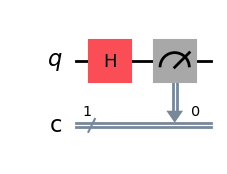


S gate applied to |0>: measurement counts
{'0': 1024}


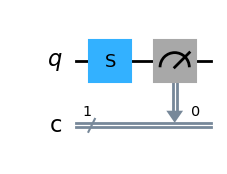


T gate applied to |0>: measurement counts
{'0': 1024}


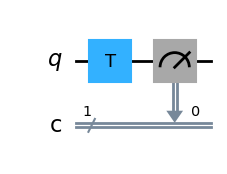


X gate applied to |0>: measurement counts
{'1': 1024}


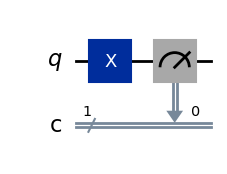


Z gate applied to |0>: measurement counts
{'0': 1024}


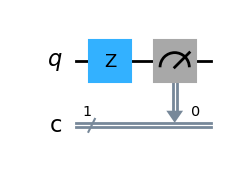

In [11]:
# Qiskit implementation of the single-qubit gates
def apply_single_qubit_gate_and_measure(gate_name: str) -> QuantumCircuit:
    """Return a circuit that starts in |0>, applies a gate, then measures."""
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit

    # Apply the chosen gate on qubit 0
    if gate_name == "H":
        qc.h(0)
    elif gate_name == "S":
        qc.s(0)
    elif gate_name == "T":
        qc.t(0)
    elif gate_name == "X":
        qc.x(0)
    elif gate_name == "Z":
        qc.z(0)
    else:
        raise ValueError(f"Unknown gate: {gate_name}")

    # Measure the qubit in the computational basis
    qc.measure(0, 0)
    return qc


# Simulate each gate on |0> and print the measurement statistics
sim = AerSimulator()
gates = ["H", "S", "T", "X", "Z"]

for g in gates:
    qc = apply_single_qubit_gate_and_measure(g)
    result = sim.run(qc, shots=1024).result()
    counts = result.get_counts()

    print(f"\n{g} gate applied to |0>: measurement counts")
    print(counts)
    display(qc.draw("mpl"))


---
# Part 2: Multi-Qubit Systems

So far we have only acted on **one qubit at a time**.
A system of two qubits lives in the tensor-product vector space

$$
\mathcal{H}_{2\text{-qubit}} = \mathbb{C}^2 \otimes \mathbb{C}^2,
$$

which is a 4-dimensional space with the computational basis

$$
\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}.
$$

If we have two *independent* single-qubit states

$$
|\psi\rangle = a|0\rangle + b|1\rangle,\qquad
|\phi\rangle = c|0\rangle + d|1\rangle,
$$

their joint state is the **tensor (Kronecker) product**, a $4 \times 1$ vector:

$$
|\psi\rangle \otimes |\phi\rangle
= ac\,|00\rangle + ad\,|01\rangle + bc\,|10\rangle + bd\,|11\rangle.
$$

In classical computation, this is the end of the story in the deterministic case-stochastic vectors can give different phenomena. A classical deterministic system of many parts (e.g., a 4-bit register) can *always* be described by simply listing the individual states of its parts. Its total state is effectively a simple product of the individual bit-states.

In quantum computing, however, this is just the beginning. A 2-qubit state that *can* be written as a product $|\Psi\rangle = |\psi\rangle \otimes |\phi\rangle$ is called **separable**.

However, quantum mechanics permits states that **cannot** be factored in this way. These are called **entangled** states. This is not merely a mathematical technicality; it is a profound and powerful resource. An entangled state is a single, global state of the 2-qubit system that cannot be described by looking at its parts individually.

Consequently, **entanglement**, in concert with **superposition** (from Part 1) and the **reversibility** of quantum gates (from section 1.2), constitutes one of the three foundational principles that distinguish quantum computing from its classical counterpart.

To create entanglement, we require **two-qubit gates**—unitaries that act on both qubits at once.

---


## 2.1 Two-Qubit Systems

### 2.1.1 Controlled-NOT (CNOT / CX) quantum gate

This is the most common two-qubit gate, and it is a cornerstone of quantum computation. We designate one qubit as the **control** and the other as the **target**:

$$
\text{CNOT}\,|a,b\rangle = |a, a \oplus b\rangle,
$$

where $\oplus$ is addition modulo 2 (a classical XOR). In short, the target bit ($b$) is flipped **if and only if** the control bit ($a$) is $1$.

**Action on Basis States:**

Let's trace this rule for all four computational basis states (assuming qubit 0 is the control and qubit 1 is the target):

* $|00\rangle$: Control is 0, so target is unchanged. $\text{CNOT}|00\rangle = |00\rangle$
* $|01\rangle$: Control is 0, so target is unchanged. $\text{CNOT}|01\rangle = |01\rangle$
* $|10\rangle$: Control is 1, so target flips $0 \rightarrow 1$. $\text{CNOT}|10\rangle = |11\rangle$
* $|11\rangle$: Control is 1, so target flips $1 \rightarrow 0$. $\text{CNOT}|11\rangle = |10\rangle$

**Matrix Form:**

In the ordered basis $|00\rangle, |01\rangle, |10\rangle, |11\rangle$, the matrix reflects this:

$$
\text{CNOT} =
\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0
\end{pmatrix}.
$$

The CNOT gate is the standard **entanglement builder**. As we will see, if we apply it after a Hadamard gate, it transforms a separable state into an entangled one.

CNOT circuit:


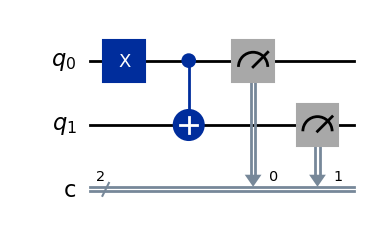

Measurement outcomes (CNOT on |01>):
{'11': 1024}


In [16]:
# Create a new quantum circuit.
# The first '2' is the number of quantum bits (qubits).
# The second '2' is the number of classical bits (for measurement results).
qc_cnot = QuantumCircuit(2, 2)

# --- Prepare the initial state |01> ---
# We start in the default state |00>.
# Apply an X-gate (NOT gate) to qubit 0.
# In Qiskit's little-endian notation, the state is read as 'q1q0'.
# So the state |00> ('00') becomes |01> ('01'), meaning q1=0, q0=1.
qc_cnot.x(0)

# --- Apply the CNOT gate ---
# qc.cx(control_qubit, target_qubit)
# Qubit 0 is the 'control'.
# Qubit 1 is the 'target'.
# Our state is |01> (q1=0, q0=1). The control (q0) is 1.
# Therefore, the target (q1) will flip from 0 to 1.
# The final state should be |11> ('11').
qc_cnot.cx(0, 1)

# --- Measure the result ---
# qc.measure(qubits_to_measure, classical_bits_to_store_in)
# We measure both qubits [0, 1].
# We store the result of qubit 0 in classical bit 0,
# and the result of qubit 1 in classical bit 1.
qc_cnot.measure([0, 1], [0, 1])

# Print and draw the final circuit
print("CNOT circuit:")
display(qc_cnot.draw("mpl"))

# --- Run the simulation ---
# Execute the circuit on the simulator 1024 times.
result = sim.run(qc_cnot, shots=1024).result()
# Get the dictionary of results
counts = result.get_counts()
# Since this circuit has no H-gates, it is deterministic.
# We expect 100% of the shots to be in one state.
print("Measurement outcomes (CNOT on |01>):")
print(counts)

### 2.1.2 Controlled-Z (CZ) quantum gate

The Controlled-Z is a 2-qubit **phase gate**. It is "controlled" just like the CNOT, but instead of flipping the target, it applies a phase flip (multiplies the state by $-1$) **if and only if** both qubits are in the $|1\rangle$ state.

**Action on Basis States:**

* $\text{CZ}|00\rangle = |00\rangle$
* $\text{CZ}|01\rangle = |01\rangle$
* $\text{CZ}|10\rangle = |10\rangle$
* $\text{CZ}|11\rangle = -|11\rangle \quad \leftarrow \text{The controlled phase is applied}$

**Matrix Form:**

This is a diagonal matrix, as it only changes phases, not amplitudes:
$$
\text{CZ} = \mathrm{diag}(1,1,1,-1) =
\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&1&0\\
0&0&0&-1
\end{pmatrix}.
$$

CNOT and CZ are closely related and can be constructed from one another using Hadamards: $(I \otimes H)\,\text{CNOT}\,(I \otimes H) = \text{CZ}$.

Theoretical Final Statevector:


<IPython.core.display.Latex object>


CZ circuit on |11> state (with measurement):


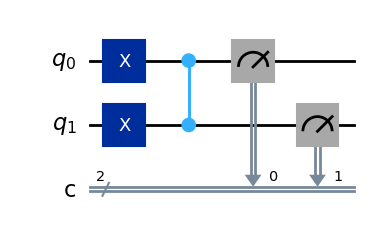

Measurement outcomes (CZ on |11>):
{'11': 1024}


In [19]:
# Create a new quantum circuit (2 qubits, 2 classical bits)
qc_cz = QuantumCircuit(2, 2)

# --- Prepare the initial state |11> ---
# We start in the default state |00>.
# Apply an X-gate (NOT gate) to qubit 0.
qc_cz.x(0)
# Apply an X-gate (NOT gate) to qubit 1.
# The state is now |11> (or '11' in Qiskit's notation).
qc_cz.x(1)

# --- Apply the Controlled-Z gate ---
# qc.cz(control_qubit, target_qubit)
# This will apply a phase of -1 *only if* both qubits are 1.
# Our state is |11>, so it will become -|11>.
qc_cz.cz(0, 1)

# --- 💡 CHECK THE THEORETICAL STATEVECTOR (before measurement) ---
# We can simulate the circuit *without* measuring
# to see the true quantum state.
final_state = Statevector(qc_cz)
print("Theoretical Final Statevector:")
# The .draw('latex') method shows the pretty mathematical output
# We expect to see -|11>, which Qiskit writes as -|11>
display(final_state.draw('latex'))
# ---

# --- Now, add measurements to the circuit for a 'real' run ---
# The measurement will destroy the phase information.
qc_cz.measure([0, 1], [0, 1])

# Print and draw the final circuit
print("\nCZ circuit on |11> state (with measurement):")
display(qc_cz.draw("mpl"))

# --- Run the simulation ---
# Execute the circuit on the simulator 1024 times.
result = sim.run(qc_cz, shots=1024).result()
# Get the dictionary of results
counts = result.get_counts()

# We expect to measure '11' with 100% probability.
# As predicted, the negative sign is gone after measurement.
print("Measurement outcomes (CZ on |11>):")
print(counts)

### 2.1.3 SWAP gate

The SWAP gate does exactly what its name implies: it exchanges the states of the two qubits.

$$
\text{SWAP}\,|a,b\rangle = |b,a\rangle.
$$

**Action on Basis States:**

* $\text{SWAP}|00\rangle = |00\rangle$ (Swapping 0 for 0 changes nothing)
* $\text{SWAP}|01\rangle = |10\rangle$ (The states are exchanged)
* $\text{SWAP}|10\rangle = |01\rangle$ (The states are exchanged)
* $\text{SWAP}|11\rangle = |11\rangle$ (Swapping 1 for 1 changes nothing)

**Matrix Form:**

$$
\text{SWAP} =
\begin{pmatrix}
1&0&0&0\\
0&0&1&0\\
0&1&0&0\\
0&0&0&1
\end{pmatrix}.
$$

The SWAP gate does **not** create entanglement by itself; it only permutes the qubits.


SWAP circuit:


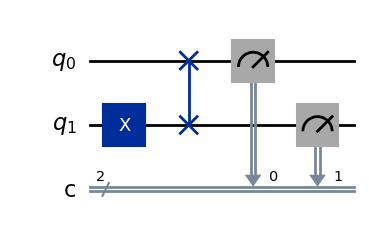

Measurement outcomes (SWAP on |10>):
{'01': 1024}


In [21]:
# SWAP demo: exchange |10> → |01>

qc_swap = QuantumCircuit(2, 2)

# Prepare |10>: qubit 0 = 1, qubit 1 = 0
qc_swap.x(1)

# Swap the two qubits
qc_swap.swap(0, 1)

# Measure both qubits
qc_swap.measure([0, 1], [0, 1])

print("SWAP circuit:")
display(qc_swap.draw("mpl"))

result = sim.run(qc_swap, shots=1024).result()
counts = result.get_counts()
print("Measurement outcomes (SWAP on |10>):")
print(counts)

### 2.1.4 Entanglement and the Bell basis

A famous family of maximally entangled 2-qubit states is the **Bell basis**:

$$
\begin{aligned}
|\Phi^+\rangle &= \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle),\\
|\Phi^-\rangle &= \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle),\\
|\Psi^+\rangle &= \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle),\\
|\Psi^-\rangle &= \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle).
\end{aligned}
$$

None of these can be written as a simple product $|\psi\rangle \otimes |\phi\rangle$. They are the simplest examples of our new quantum resource: entanglement.

A very common “Bell-pair recipe” is:

$$
\text{CNOT}\,(H \otimes I)\,|00\rangle
= \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = |\Phi^+\rangle.
$$

In the next code cell, you will build **all four Bell states** using only single-qubit
gates (H, X, Z) and CNOT.

In [ ]:
def bell_circuit(which='phi+'):
    qc = QuantumCircuit(2, name=f"Bell-{which}")
    
    # |00> -> H on qubit 0 -> CNOT(0->1)
    # TODO: 1. Add the Hadamard gate to qubit 0
    ... # FILL IN
    
    # TODO: 2. Add the CNOT gate (control=0, target=1)
    ... # FILL IN

    # Post tweaks to reach each Bell state
    if which == 'phi+':   # (|00>+|11>)/sqrt(2)
        pass
    elif which == 'phi-': # (|00>-|11>)/sqrt(2)
        # TODO 3. Add the correct gate to get |phi->
        ... # FILL IN
        
    elif which == 'psi+': # (|01>+|10>)/sqrt(2)
        # TODO 4. Add the correct gate to get |psi+>
        ... # FILL IN

    elif which == 'psi-': # (|01>-|10>)/sqrt(2)
        # TODO: Add the correct gates to get |psi->
        ... # FILL IN
        
    else:
        raise ValueError("which ∈ {'phi+','phi-','psi+','psi-'}")
    return qc

# --- Test the Bell state circuits ---
for label in ['phi+','phi-','psi+','psi-']:
    qc = bell_circuit(label)
    sv = Statevector.from_label('00').evolve(qc)
    
    print(f"--- {label} state ---")
    print(f"Circuit ({label}):")
    display(qc.draw('mpl')) # 'mpl' for a nicer plot
    
    print("Symbolic statevector:")
    # Use prefix to add a nice label to the latex output
    display(sv.draw('latex', prefix=f"|{label}\\rangle = "))

### 2.1.5 Gate Decompositions: Building Gates from Others - CX vs CZ
A key concept in quantum computing is that we can *build* (or "decompose") complex gates from a small set of simpler, fundamental gates.
* **Example: Building CNOT from CZ**
    The CNOT and CZ gates are almost the same. They just differ by a "change of basis." If you put a Hadamard gate *before and after* the *target* qubit of a CZ gate, you get a CNOT gate!
    $$
    CX(c, t) = (I \otimes H_t) \cdot CZ(c, t) \cdot (I \otimes H_t)
    $$
    We'll build this in the exercise below.

In [ ]:
# --- Exercise: Build a CNOT from a CZ gate ---

# We'll use Operator.equiv() to check if two circuits do the same thing.
# This is a very powerful way to verify your work!
print("\n--- Exercise: Build a CNOT from a CZ ---")
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1) # Control=0, Target=1
op_cnot = Operator(qc_cnot) # The "target" operator

# TODO 1. Build a CNOT using only qc.h() and qc.cz()
# Hint: Surround the target qubit (q1) with H gates,
#       and use a cz in the middle.
qc_cz_build = QuantumCircuit(2)

... # FILL IN (H on target)
... # FILL IN (CZ gate)
... # FILL IN (H on target)

print("Your constructed circuit:")
display(qc_cz_build.draw('mpl'))

# --- Check the answer ---
op_build = Operator(qc_cz_build)

# .equiv() checks if two operators are the same (ignoring global phase)
if op_cnot.equiv(op_build):
    print("\n✅ Success! Your circuit is equivalent to a CNOT.")
else:
    print("\n❌ Not quite. Your circuit does not match a CNOT.")
    print("Hint: Remember the H gates go on the *target* qubit (q1).")

## 2.2 Three-Qubit Systems: GHZ state, Toffoli, and Multi-Control

### GHZ State
The Greenberger–Horne–Zeilinger (GHZ) state is the 3-qubit equivalent of a Bell pair. It's a "maximally entangled" state involving three or more qubits.
$$
|GHZ_3\rangle=\frac{|000\rangle+|111\rangle}{\sqrt{2}}
$$
One common recipe to create it from the $|000\rangle$ state is:
1.  Apply $H$ to qubit 0 (creates superposition).
2.  Apply $CNOT(0 \to 1)$ (links qubit 1 to 0).
3.  Apply $CNOT(0 \to 2)$ (links qubit 2 to 0).

Now, if you measure qubit 0, all three qubits instantly collapse to either $|000\rangle$ or $|111\rangle$. They are all perfectly correlated.

In [ ]:
# --- Exercise: Create the GHZ State ---
def ghz_3():
    qc = QuantumCircuit(3, name="GHZ3")
    
    # TODO: 1. (H) on qubit 0
    ... # FILL IN
    
    # TODO: 2. CNOT(0->1)
    ... # FILL IN
    
    # TODO: 3. CNOT(0->2)
    ... # FILL IN
    
    return qc

# --- Test the GHZ circuit ---
ghz = ghz_3()
sv = Statevector.from_label('000').evolve(ghz)

print("--- GHZ state ---")
print("Circuit (GHZ3):")
display(ghz.draw('mpl'))

print("Symbolic statevector:")
display(sv.draw('latex', prefix="|GHZ_3\\rangle = "))

### The Toffoli Gate (CCX or CCNOT)
The **Toffoli** gate (also called **CCX** or **CCNOT**) is a 3-qubit gate. It is a "Controlled-Controlled-NOT" gate.
* **Action:** It flips the target qubit *if and only if* both control qubits are in the $|1\rangle$ state.
* **Symbol:** * **Rule:** $|a, b, c\rangle \mapsto |a, b, c \oplus (a \wedge b)\rangle$, where $\wedge$ is "AND" and $\oplus$ is "XOR".
* **Significance:** The Toffoli gate (along with a single-qubit rotation like $T$) is **universal** for quantum computation. This means *any* quantum algorithm can be built using only these gates.

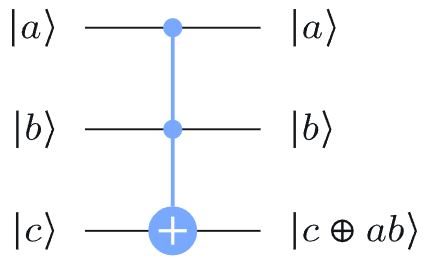

Image taken from: [5]

---
## References — IEEE

[1] D. Cardinal, "IBM Unveils Q System One Quantum Computer," *ExtremeTech*, Jan. 10, 2019. [Online]. Available: https://www.extremetech.com/extreme/283427-quantum-computing-goes-commercial-with-ibms-q-system-one

[2] IBM Quantum, “Basics of Quantum Information,” online course, 2025. [Online]. Available: https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information. Accessed: Oct. 15, 2025.

[3] IBM Quantum, “Qiskit Global Summer School 2025: Course Materials,” 2025. [Online]. Available: https://qiskit.org/learn/summer-school. Accessed: Nov. 2, 2025.

[4] Qiskit Community, “Qiskit Learning Portal,” 2025. [Online]. Available: https://qiskit.org/learn. Accessed: Oct. 31, 2025.

[5] "Simulating Classical Computations," *Fundamentals of Quantum Algorithms*, IBM Quantum. [Online]. Available: https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-algorithmic-foundations/simulating-classical-computations
